In [1]:
from __future__ import print_function
import pyemma
print(pyemma.version)
import pickle
import itertools
import pyemma.plots as pp
import numpy as np
import itertools
import mdtraj
import mdtraj as md
from pyemma.util.contexts import settings

/net/home/cricci/miniconda2/lib/python2.7/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


2.5.4


In [2]:
from __future__ import print_function
import pyemma
pyemma.version
import pickle
import numpy as np
%pylab inline
import pyemma.msm as msm
import pyemma.plots as mplt
import pyemma.plots as pp
%pylab inline
from glob import glob

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/net/home/cricci/miniconda2/lib/python2.7/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)
/net/home/cricci/miniconda2/lib/python2.7/site-packages/pyemma/__init__.py:134: UserWarning: Python 2.7 usage is deprecated. Future versions of PyEMMA will not support it. Please upgrade your Python installation.
  "Please upgrade your Python installation.", category=UserWarning)


In [3]:
coor=pyemma.coordinates

In [4]:
import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# MSM 2: Features with L1 anchors

### Load features

Loading WT and Tau simulations separately, but then after that joining their features

- Tau - original + new simulations

In [5]:
indir = '/mnt/cricci-old-data/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau' ## directory with input coordinates
otdir = '/mnt/cricci-old-data/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/NEW_Tau_simulations/production/simulations4MSM'## directory with new set of coordinates
topfile = '/mnt/cricci-old-data/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/Tau_nowater.prmtop' ## topology file
from glob import glob
traj_list1 = glob(indir + '/nowater*.nc')
traj_list1.sort() # Creating a list with all trajectory files in ascending order
traj_list2= glob(otdir + '/*nc')
traj_list2.sort() # Creating a list with all trajectory files in ascending order
traj_list = traj_list1 + traj_list2 # combining the two lists


len(traj_list)


#indir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_WT' ## directory with input coordinates
#topfile = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_WT/WT_nowater.prmtop' ## topology file
#from glob import glob
#traj_list = glob(indir + '/nowater*.nc')
#traj_list.sort()# Creating a list with all trajectory files in ascending order

30

In [6]:
feat = coor.featurizer(topfile)

Identifying the residue pairs whose distances are taken as features:

In [7]:
#pair_list=([[170,124],[169,124],[170,222],[170,182],[175,217]])
#pair_list=([[16,41],[16,73],[16,148],[16,157],[16,170],[16,125],[16,217],[41,73],[41,148],[41,157],[41,170],[41,125],[41,217],[73,148],[73,157],[73,170],[73,125],[73,217],[148,157],[148,170],[148,125],[148,217],[157,170],[157,125],[157,217],[170,125],[170,217],[125,217]])
pair_list=([[16,170],[41,170],[148,170],[170,125],[170,217]])

In [8]:
feat.add_residue_mindist(residue_pairs=pair_list, scheme='ca', periodic=True, ignore_nonprotein=True)

Checking that we selected the correct residues:

In [9]:
feat.describe()

['RES_DIST (ca) SER16 - LEU170',
 'RES_DIST (ca) THR41 - LEU170',
 'RES_DIST (ca) GLY148 - LEU170',
 'RES_DIST (ca) LEU170 - ASP125',
 'RES_DIST (ca) LEU170 - THR217']

Loading feature data into memory:

In [10]:
data_tau = pyemma.coordinates.load(traj_list, features=feat)

AttributeError: 'str' object has no attribute 'isnumeric'

Printing number of trajectories being used for double checking that we're using the right ones:

In [11]:
len(traj_list)

30

Wild-Type

In [12]:
indir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_WT' ## directory with input coordinates
otdir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/NEW_WT_simulations/production/simulations4MSM'## directory with new set of coordinates
topfile = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_WT/WT_nowater.prmtop' ## topology file
from glob import glob
traj_list1 = glob(indir + '/nowater*.nc')
traj_list1.sort() # Creating a list with all trajectory files in ascending order
traj_list2= glob(otdir + '/*nc')
traj_list2.sort() # Creating a list with all trajectory files in ascending order
traj_list = traj_list1 + traj_list2 # combining the two lists
len(traj_list)

30

In [13]:
feat = coor.featurizer(topfile)

In [14]:
#pair_list=([[170,124],[169,124],[170,149],[169,151],[170,17],[168,186],[170,222],[170,182],[49,35],[59,115],[43,124],[43,169],[53,65],[53,147],[218,16],[218,43],[218,127],[221,222],[175,217],[175,214],[175,211]])
#pair_list=([[170,124],[169,124],[170,149],[169,151],[170,17],[168,186],[170,222],[170,182],[218,16],[218,43],[218,127],[175,217],[175,214]])
#pair_list=([[16,41],[16,73],[16,148],[16,157],[16,170],[16,125],[16,217],[41,73],[41,148],[41,157],[41,170],[41,125],[41,217],[73,148],[73,157],[73,170],[73,125],[73,217],[148,157],[148,170],[148,125],[148,217],[157,170],[157,125],[157,217],[170,125],[170,217],[125,217]])
pair_list=([[16,170],[41,170],[148,170],[170,125],[170,217]])

In [15]:
feat.add_residue_mindist(residue_pairs=pair_list, scheme='ca', periodic=True, ignore_nonprotein=True)

In [16]:
feat.describe()

['RES_DIST (ca) SER16 - LEU170',
 'RES_DIST (ca) THR41 - LEU170',
 'RES_DIST (ca) GLY148 - LEU170',
 'RES_DIST (ca) LEU170 - ASP125',
 'RES_DIST (ca) LEU170 - THR217']

In [17]:
data_wt = pyemma.coordinates.load(traj_list, features=feat)

Obtaining file info:   0%|          | 0/30 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/30 [00:00<?, ?it/s]

In [18]:
len(traj_list)

30

Joining both features for tICA:

In [19]:
#joint_features = data_wt + data_wt_new + data_tau + data_tau_new
joint_features = data_tau + data_wt
#joint_features = data_tau + data_tau_new

In [20]:
len(joint_features)

60

Number above corresponds to total number of trajectories for all systems considered

# tICA

tICA analysis requires selecting a lag time. Below, we run different tICAs at different lag times and project the free energy landscape in terms of the identified tICs to see when the number of tICs (number of dimensions that is printed above middle figure) and the FEL starts to roughly converge. Ideally, we want the smallest lag time possible.

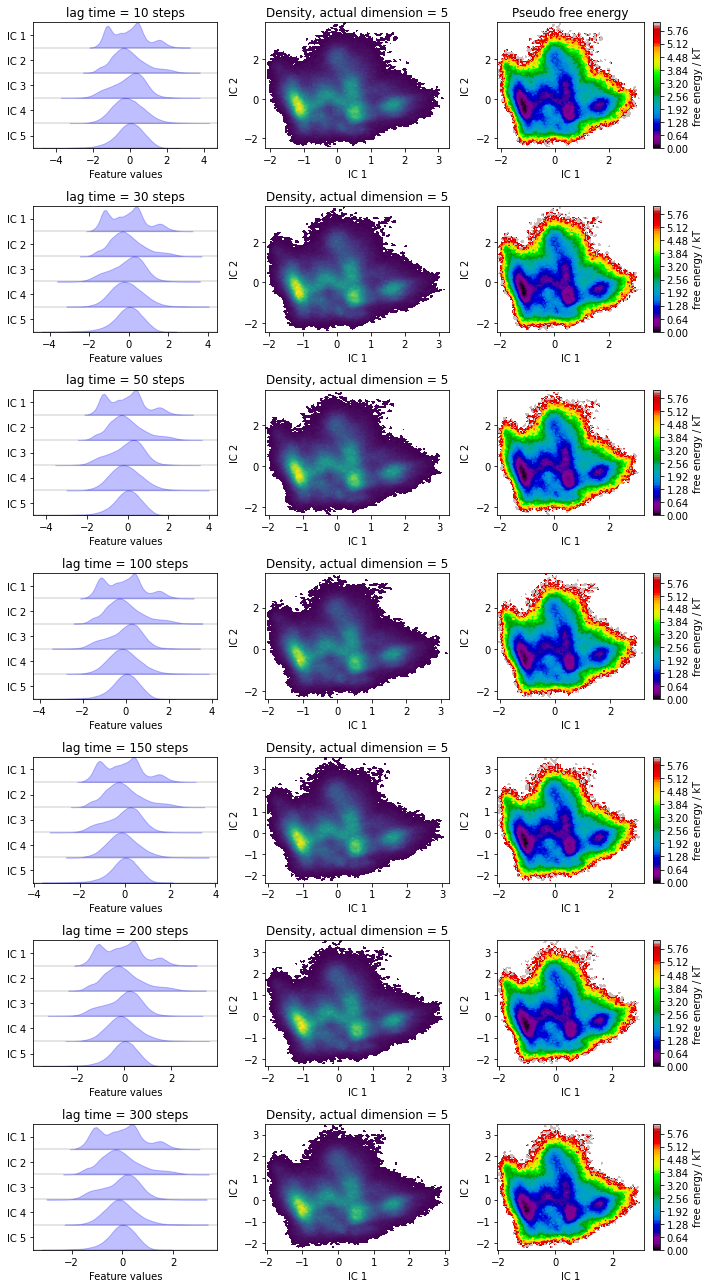

In [149]:
lags = [ 10, 30, 50, 100, 150, 200, 300]  ## List of selected lag times

fig, axes = plt.subplots(7, 3, figsize=(10, 18))
for i, lag in enumerate(lags):
    tica = pyemma.coordinates.tica(joint_features, lag=lag)
    tica_concatenated = np.concatenate(tica.get_output())
    pyemma.plots.plot_feature_histograms(
        tica_concatenated,
        ['IC {}'.format(i + 1) for i in range(tica.dimension())],
        ax=axes[i, 0])
    axes[i, 0].set_title('lag time = {} steps'.format(lag))
    axes[i, 1].set_title(
        'Density, actual dimension = {}'.format(tica.dimension()))
    pyemma.plots.plot_density(
        *tica_concatenated[:, :2].T, ax=axes[i, 1], cbar=False)
    pyemma.plots.plot_free_energy(
        *tica_concatenated[:, :2].T, ax=axes[i, 2], legacy=False)
for ax in axes[:, 1:].flat:
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
axes[0, 2].set_title('Pseudo free energy')
fig.tight_layout()

Selecting lag time of 3 ns (since the stride between frames in my trajectories is 0.1 ns, that corresponds to a lag time of 30 frames, which is the value given to pyemma)

In [56]:
tica = pyemma.coordinates.tica(joint_features, lag=30)  ## change lag = X to selected lag time
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

calculate covariances:   0%|          | 0/60 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/60 [00:00<?, ?it/s]

Verifying number of tICs at selected lag time:

In [57]:
tica.dimension()

5

Plotting tICA correlation with initial features (we can use this information to see which features are related with the slowest motions, or select features to discard from initial feature set):

In [23]:
#features_labels = ['L171 - R125', 'N170 - R125', 'L171 - L150', 'N170 - K152', 'L171 - F18','K169 - E187', 'L171 - Y223', 'L171 - H183', 'E50 - K36', 'G60 - Y116', 'H44 - R125', 'H44 - N170', 'Y54 - I66', 'Y54 - F148', 'K219 - S17', 'K219 - H44', 'K219 - K128', 'K222 - Y223', 'R/C176 - T218', 'R/C176 - K215' ,'R/C176 - Q212']
#features_labels = ['L171 - R125', 'N170 - R125', 'L171 - L150', 'N170 - K152', 'L171 - F18','K169 - E187', 'L171 - Y223', 'L171 - H183', 'K219 - S17', 'K219 - H44', 'K219 - K128', 'R/C176 - T218', 'R/C176 - K215']
#features_labels = ['L171 - R125', 'N170 - R125', 'L171 - Y223', 'L171 - H183', 'R/C176 - T218', 'R/C176 - K215']
#features_labels = ['SER16 - THR41','SER16 - ASP73','SER16 - GLY148','SER16 - ARG157','SER16 - LEU170','SER16 - ASP125','SER16 - THR217','THR41 - ASP73','THR41 - GLY148','THR41 - ARG157','THR41 - LEU170','THR41 - ASP125','THR41 - THR217','ASP73 - GLY148','ASP73 - ARG157','ASP73 - LEU170','ASP73 - ASP125','ASP73 - THR217','GLY148 - ARG157','GLY148 - LEU170','GLY148 - ASP125','GLY148 - THR217','ARG157 - LEU170','ARG157 - ASP125','ARG157 - THR217','LEU170 - ASP125','LEU170 - THR217','ASP125 - THR217']
features_labels = ['SER16','THR41','GLY148','ASP125','THR217']

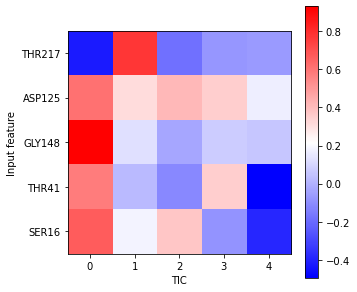

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
i = ax.imshow(tica.feature_TIC_correlation, cmap='bwr')

ax.set_xticks(range(tica.dimension()))
ax.set_xlabel('TIC')

ax.set_yticks(range(feat.dimension()))
ax.set_yticklabels(features_labels)
ax.set_ylabel('Input feature')

ax.set_xlim(-0.5,4.5)
ax.set_ylim(-0.5,4.5)

fig.colorbar(i);
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/tica_correlation_lag_30steps_5dist.pdf', bbox_inches = 'tight')

Now that we've run tICA in the joint space of WT and the Tau mutant (so we make sure that the tICs are the same between them and the FEL from each are directly comparable), we can separate the WT and mutant simulations to look at the FEL separately (and also because we'll build separate MSMs)

- FEL in terms of joint tICA features:

In [25]:
tica_tau = tica_output[0:30]  ## Here I'm including just wildtype !!!
tica_concatenated_tau = np.concatenate(tica_tau)

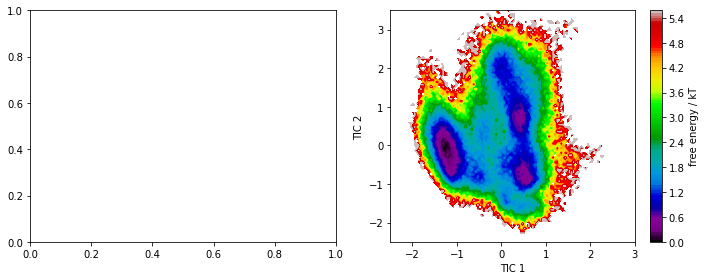

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 1], nbins=100, ax=axes[1])
axes[1].set_xlabel('TIC 1')
axes[1].set_ylabel('TIC 2')
axes[1].set_xlim(-2.5,3.0)
axes[1].set_ylim(-2.5,3.5)
fig.tight_layout()
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_lag30_5dist.pdf', bbox_inches = 'tight')

Seeing tICs variation along concatenated simulation time

Text(0, 0.5, 'IC 3')

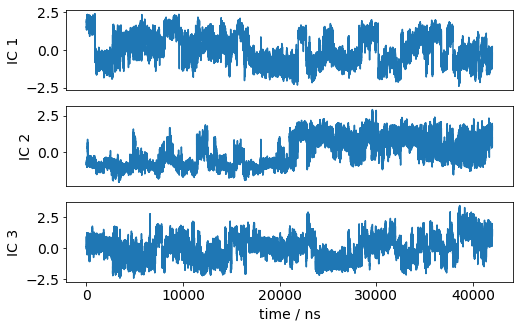

In [42]:
matplotlib.rcParams.update({'font.size': 14})
dt = 0.1
figure(figsize(8,5))
ax1=plt.subplot(311)
x = dt*np.arange(len(tica_concatenated))
plot(x, tica_concatenated[:,0]); ylabel('IC 1'); xticks([])
ax1=plt.subplot(312)
plot(x, tica_concatenated[:,1]); ylabel('IC 2'); xticks([])
ax1=plt.subplot(313)
plot(x, tica_concatenated[:,2]); xlabel('time / ns'); ylabel('IC 3')

- Tau (R176C) FEL in terms of joint tICA features:

In [29]:
tica_tau = tica_output[1:30] ## change numbers to appropriately select other system's simulations
tica_concatenated_tau = np.concatenate(tica_tau)

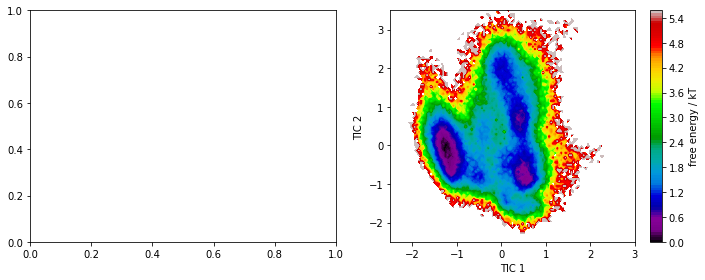

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 1], nbins=100, ax=axes[1])
axes[1].set_xlabel('TIC 1')
axes[1].set_ylabel('TIC 2')
axes[1].set_xlim(-2.5,3.0)
axes[1].set_ylim(-2.5,3.5)
fig.tight_layout()
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_FEL_lag30_5dist.pdf', bbox_inches = 'tight')

Now we need to decide on the number of clusters. This is done for wiltype and mutant separately

# Discretization: Tau

To aid selection of the appropriate number of clusters, we do kmeans clustering at defined number of k clusters, build MSM models at the respective discretization spaces and look at a model validation metric (ITS plots). The best k selection will yield the smoothest ITS plots, but we want to avoid very low number of clusters (for ex k ~ 50) because it meanS poorly discretized spaces.

Number of clusters = 50


initialize kmeans++ centers:   0%|          | 0/50 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 100


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 150


initialize kmeans++ centers:   0%|          | 0/150 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 200


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 250


initialize kmeans++ centers:   0%|          | 0/250 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 300


initialize kmeans++ centers:   0%|          | 0/300 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

Number of clusters = 500


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

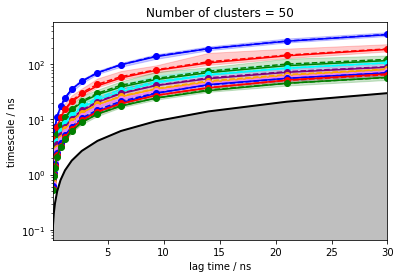

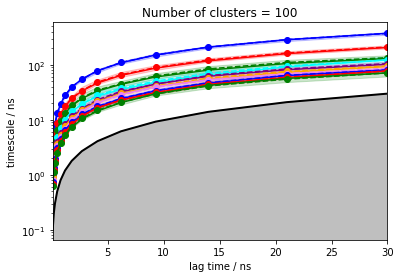

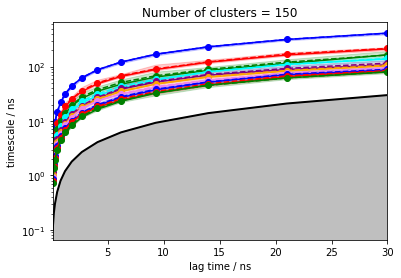

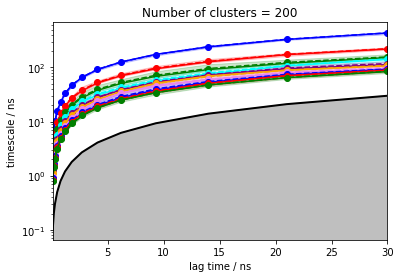

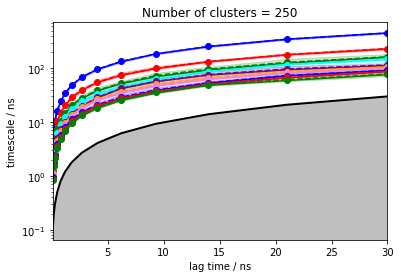

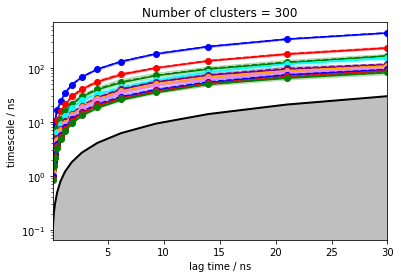

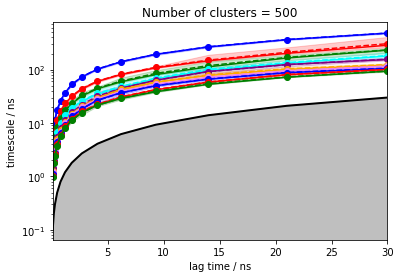

In [32]:
for i, k in enumerate([50, 100, 150, 200, 250, 300,500]):  ## number of clusters being considered
    fig = plt.figure()
    print('Number of clusters = ' +str(k))
    cluster_tau = pyemma.coordinates.cluster_kmeans(tica_tau, k=k, max_iter=50, stride=10, fixed_seed=1)
    dtrajs_concatenated_tau = np.concatenate(cluster_tau.dtrajs)
    
    its = pyemma.msm.its(cluster_tau.dtrajs, lags=300, nits=10, errors='bayes')
    pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1)
    plt.title('Number of clusters = '+str(k))

# Proceeding ahead with 250 clusters:

# k = 250

In [95]:
cluster_tau = pyemma.coordinates.cluster_kmeans(
    tica_tau, k=200, max_iter=50, stride=10)
dtrajs_concatenated_tau = np.concatenate(cluster_tau.dtrajs)  ## specify number of clusters with the k parameter

initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/29 [00:00<?, ?it/s]

We can plot the free energy landscape with the above determined cluster centers, in black, to see where they are located:

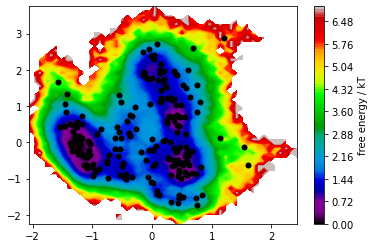

In [96]:
pp.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 1], nbins=50)
cc_x = cluster_tau.clustercenters[:,0]
cc_y = cluster_tau.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

Calculating the ITS plot for selection of the model's lag time:

estimating BayesianMSM:   0%|          | 0/14 [00:00<?, ?it/s]

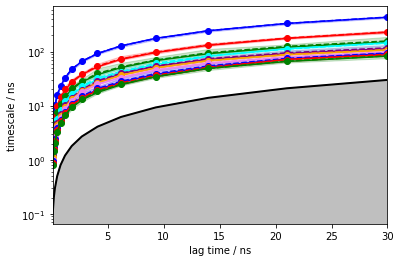

In [97]:
fig, ax = plt.subplots()

its = pyemma.msm.its(cluster_tau.dtrajs, lags=300, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_ITS_lag30_5dist_k250.pdf', bbox_inches = 'tight')

Going with 10 ns for the lag time.

IMPORTANT: Your MSM lag time should always be equal to or larger than the tICA lagtime, because tICA resolves motions only at longer timescales than the selected lag time and thus it doesn't make sense to built a MSM at a lag time inferior to that. You would get a model, but it wouldn't be correct.

In [98]:
#msm_wt = pyemma.msm.bayesian_markov_model(cluster_wt.dtrajs, lag=10, dt_traj='1 step') # dt specifies the timestep
msm_tau = pyemma.msm.bayesian_markov_model(cluster_tau.dtrajs, lag=100, dt_traj='0.1 ns') 
#msm_wt = pyemma.msm.bayesian_markov_model(cluster_wt.dtrajs, lag=100, dt_traj='0.1 ns', connectivity='largest') 
#msm_wt = pyemma.msm.bayesian_markov_model(cluster_wt.dtrajs, lag=300, dt_traj='0.1 ns', mincount_connectivity=0.0001) 
                                                                                        # between frames for conversion to time units
print('fraction of states used = {:.2f}'.format(msm_tau.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_tau.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[80]: compute stat. inefficiencies:   0%|          | 0/12570 [00…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[80]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


Now, we'll plot the timescales of the 15 slowest motions at our selected lag time and the relative ratio between consecutive timescales to help us define how many metastable states to use for coarse-graining of the model:

In [99]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (16).

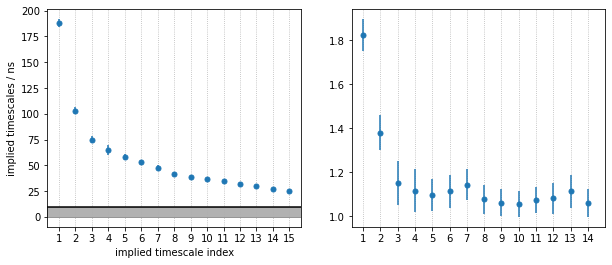

In [100]:
nits = 15

timescales_mean = msm_tau.sample_mean('timescales', k=nits)
timescales_std = msm_tau.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_tau.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_tau.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/WT_ITS_sep_k_200_lag_10ns.pdf', bbox_inches = 'tight')

We basically want to find a gap between sequential timescales, and that will indicate the number of slow metastable states. Above, there's a gap between implied timescale indices 2 and 3, represented by the large separation on indices 3/4 on the graph in the right (separation above 1.5). So that indicates that we have 2 slow motions in our system, which would mean 3 metastable states.

We go on by analyzing the stationary distribution and the free energy computed over the first two TICA coordinates. The stationary distribution, π, is stored in msm.pi or (as an alias) msm.stationary_distribution. We compute the free energy landscape by re-weighting the trajectory frames with stationary probabilities from the MSM (returned by msm.trajectory_weights()).

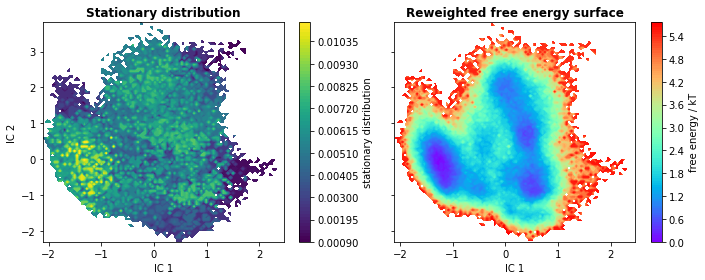

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated_tau[:, :2].T,
    msm_tau.pi[dtrajs_concatenated_tau],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated_tau[:, :2].T,
    weights=np.concatenate(msm_tau.trajectory_weights()),
    ax=axes[1],
    cmap='rainbow',
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Stationary_dist_and_FEL_Tau.pdf', bbox_inches = 'tight')

The eigenvectors of the MSM contain information about the conformational changes are happening, governed by the correponding implied timescales. Specifically, the minimum and maximum-valued components of an eigenvector indicate the states between a process shifts probability. The relaxation timescale of this exchange process is exactly the implied timescale.

The first eigenvector is one: True (min=0.999999999999967, max=1.000000000000034)


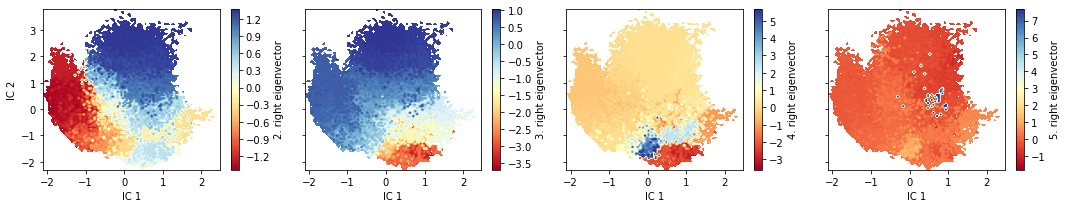

In [102]:
eigvec = msm_tau.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated_tau[:, :2].T,
        eigvec[dtrajs_concatenated_tau, i + 1],
        ax=ax,
        cmap='RdYlBu',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/probability_shifts_on_FEL_Tau.pdf', bbox_inches = 'tight')

##### Below we do PCCA to see which clusters belong to each metastable states, and where they are located in the FEL. Going forward with the 5 states:

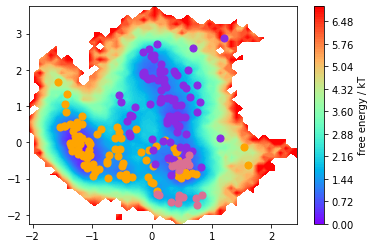

In [103]:
nc = 3  ## Indicate number os states
msm_tau.pcca(nc)

fig, ax = pp.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 1], nbins=50, cmap='rainbow')
pcca_sets = msm_tau.metastable_sets
#ax.scatter(cluster_wt.clustercenters[pcca_sets[7],0], cluster_wt.clustercenters[pcca_sets[7],1], color='cyan', s=50)#ax.scatter(cluster_wt.clustercenters[pcca_sets[4],0], cluster_wt.clustercenters[pcca_sets[4],1], color='crimson', s=50)
#ax.scatter(cluster_wt.clustercenters[pcca_sets[5],0], cluster_wt.clustercenters[pcca_sets[5],1], color='purple', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[1],0], cluster_tau.clustercenters[pcca_sets[1],1], color='orange', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[2],0], cluster_tau.clustercenters[pcca_sets[2],1], color='blueviolet', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[0],0], cluster_tau.clustercenters[pcca_sets[0],1], color='palevioletred', s=50)

#ax.scatter(cluster_tau.clustercenters[pcca_sets[3],0], cluster_tau.clustercenters[pcca_sets[3],1], color='cornflowerblue', s=50)
#ax.scatter(cluster_wt.clustercenters[pcca_sets[4],0], cluster_wt.clustercenters[pcca_sets[4],1], color='silver', s=50)
#ax.scatter(cl.clustercenters[pcca_sets[7],0], cl.clustercenters[pcca_sets[7],1], color='orange', s=50)

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_PCCA_lag30_5dist_k250_3states.pdf', bbox_inches = 'tight')

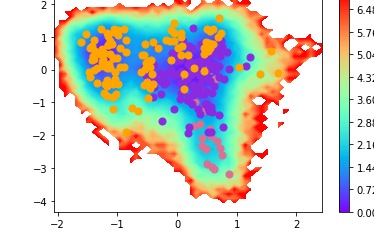

In [194]:
nc = 3  ## Indicate number os states
msm_tau.pcca(nc)

fig, ax = pp.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 4], nbins=50, cmap='rainbow')
pcca_sets = msm_tau.metastable_sets
#ax.scatter(cluster_wt.clustercenters[pcca_sets[7],0], cluster_wt.clustercenters[pcca_sets[7],1], color='cyan', s=50)#ax.scatter(cluster_wt.clustercenters[pcca_sets[4],0], cluster_wt.clustercenters[pcca_sets[4],1], color='crimson', s=50)
#ax.scatter(cluster_wt.clustercenters[pcca_sets[5],0], cluster_wt.clustercenters[pcca_sets[5],1], color='purple', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[0],0], cluster_tau.clustercenters[pcca_sets[0],4], color='palevioletred', s=50)
#ax.scatter(cluster_wt.clustercenters[pcca_sets[3],3], cluster_wt.clustercenters[pcca_sets[3],4], color='cornflowerblue', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[2],0], cluster_tau.clustercenters[pcca_sets[2],4], color='blueviolet', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[1],0], cluster_tau.clustercenters[pcca_sets[1],4], color='orange', s=50)
#ax.scatter(cluster_wt.clustercenters[pcca_sets[4],3], cluster_wt.clustercenters[pcca_sets[4],4], color='silver', s=50)
#ax.scatter(cl.clustercenters[pcca_sets[7],0], cl.clustercenters[pcca_sets[7],1], color='orange', s=50)

fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_PCCA_TIC1_TIC5.pdf', bbox_inches = 'tight')

In [47]:
A = msm_tau.metastable_sets[0]
B = msm_tau.metastable_sets[1]
flux = pyemma.msm.tpt(msm_tau, A, B)

TypeError: plot_contour() got multiple values for argument 'ax'

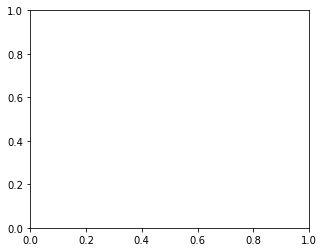

In [51]:
fig, ax = plt.subplots(figsize=(5, 4))
pyemma.plots.plot_contour(
    *tica_concatenated_tau.T,
    flux.committor[cluster_tau.dtrajs[0]],
    ax=ax,
    cmap='brg',
    mask=True,
    cbar_label=r'committor A $\to$ B')
ax.set_xlabel('$x$')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_ylabel('$y$')
fig.tight_layout()



Testing another method to obtain the meta-stable states (HMSM instead of HMM)

estimating BayesianHMSM:   0%|          | 0/12 [00:00<?, ?it/s]

21-06-21 15:11:05 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[81] WARNING  Changed user setting nits to the number of available timescales nits=2


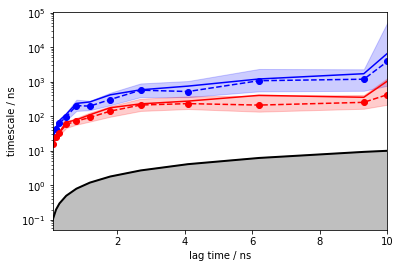

In [104]:
fig, ax = plt.subplots()

its = pyemma.msm.timescales_hmsm(cluster_tau.dtrajs, 3, lags=100, nits=5, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_HSMS_ITS_lag30_k250_lag10ns_3states.pdf', bbox_inches = 'tight')

Creating a hidden coarse-grained model (HMSM) with lag time = 3ns 

In [105]:
hmm_3_3ns_tau = pyemma.msm.bayesian_hidden_markov_model(cluster_tau.dtrajs, 3, lag=30)

Sampling HMSMs:   0%|          | 0/100 [00:00<?, ?it/s]

Extracting the stationary distribution

In [106]:
hmm_3_3ns_tau.stationary_distribution

array([0.19527415, 0.48233156, 0.32239429])

And standard deviation

In [107]:
hmm_3_3ns_tau.sample_std('stationary_distribution')

array([0.05588102, 0.09342865, 0.08173818])

In [113]:
hmm_3_3ns_tau.mfpt(2,1)

14406.902827381855

Creating an alternative hidden coarse-grained model (HMSM) with number of meta-stable states = 2

In [202]:
hmm_2_3ns_tau = pyemma.msm.bayesian_hidden_markov_model(cluster_tau.dtrajs, 2, lag=30)

In [203]:
hmm_2_3ns_tau.stationary_distribution

array([0.45345787, 0.54654213])

In [204]:
hmm_2_3ns_tau.sample_std('stationary_distribution')

array([0.08062499, 0.08062499])

In [212]:
hmm_2_3ns_tau.mfpt(1,0)

8497.285181108098

CK test

estimating BayesianHMSM:   0%|          | 0/4 [00:00<?, ?it/s]

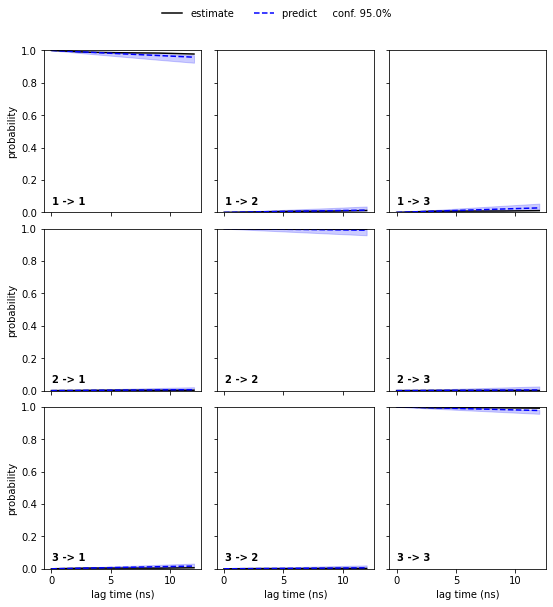

In [120]:
_, ax = pyemma.plots.plot_cktest(hmm_3_3ns_tau.cktest(mlags=5), units='ns', dt=0.1)

_.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_CK_HMSM_5distances_lag30_k200_lag3ns_3states.pdf', bbox_inches = 'tight')

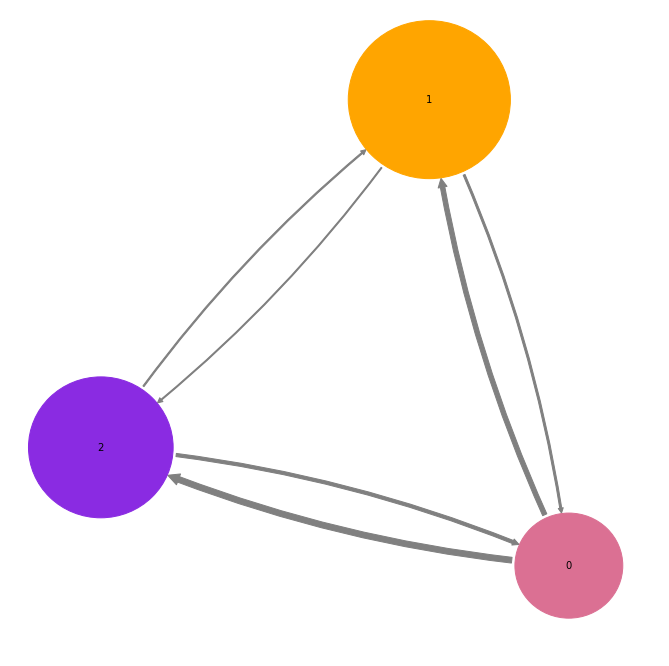

In [221]:
# Plotting image
#fig, axes = mplt.plot_markov_model(hmm_wt, state_colors=['olivedrab','thistle','palevioletred','purple','crimson'], arrow_labels=None)
fig, axes = mplt.plot_markov_model(hmm_3_3ns_tau, state_colors=['palevioletred','orange','blueviolet', ], arrow_labels=None)
gca().set_frame_on(False)
fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_HMSM_5distances_lag30_k250_lag3ns_3states.pdf', bbox_inches = 'tight')

Time to save the HMSM model

In [222]:
# Save model
cluster_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_5distances_lag30steps_k250_clustering_kmeans.pyemma', overwrite=True, model_name='kmeans_Tau_nsteps30_k250')
msm_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_5distances_lag30steps_k250_HMSMlag3ns_3states.pyemma', overwrite=True, model_name='msm_Tau_nsteps30_HMSM')

This is the old method for coarse-graining.
Time for coarse graining using Hidden Markov models! Below, we build a HMM with 4 states and obtain the equilibrium population of each of them:

In [223]:
hmm_tau = msm_tau.coarse_grain(3)  ## specify number of metastable states
hmm_tau.stationary_distribution

22-12-20 16:50:22 pyemma.msm.estimators.bayesian_msm.BayesianMSM[176] WARNING  Requested coarse-grained model with 3 metastable states at lag=100. The ratio of relaxation timescales between 3 and 4 states is only 1.323530298269391 while we recommend at least 1.5. It is possible that the resulting HMM is inaccurate. Handle with caution.


array([0.13250134, 0.25765218, 0.60984647])

In [175]:
# Plotting image
#fig, axes = mplt.plot_markov_model(hmm_wt, state_colors=['olivedrab','thistle','palevioletred','purple','crimson'], arrow_labels=None)
fig, axes = mplt.plot_markov_model(hmm_tau, state_colors=['orangered','orange', 'palevioletred'], arrow_labels=None)
gca().set_frame_on(False)
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/CA_Model/WT_HMM_5distances_lag_50steps_k_200_lag_10ns_4states.pdf', bbox_inches = 'tight')


ValueError: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately

For model validation, we can do the CK test using the above-indentified number of states:

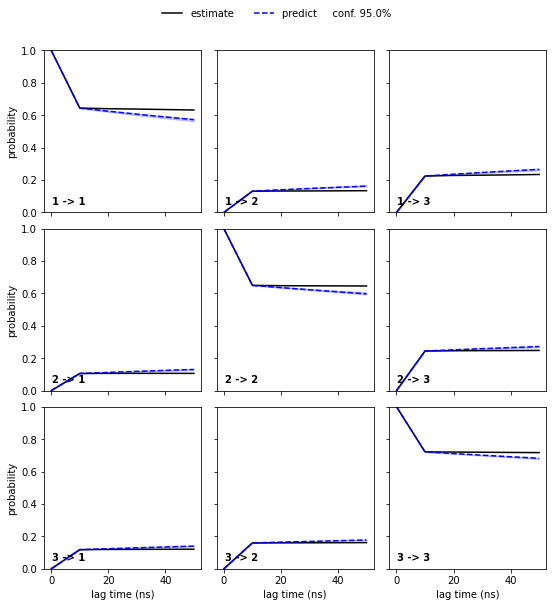

In [109]:
nstates = 3
cktest = msm_wt.cktest(nstates, mlags=6)

_, ax =  pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
#_.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/WT_Model/WT_CK_HMM_5distances_lag_50ns_k_200_lag_15ns_4states.pdf', bbox_inches = 'tight')
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/WT_CKtest_k_200_lag_10_2.pdf', bbox_inches = 'tight')

Finally, it's very important to save your best working models, since every time you do kmeans clustering the clusters' location and composition can be slightly different, and thus your final model can be altered as well. Below, we save the clustering results and the msm model built above.

In [173]:
# Save model
#cluster_wt.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_6distances_lag_50steps_k=200_clustering_kmeans_HMM.pyemma', overwrite=True, model_name='HMM_kmeans_WT_nsteps_50_k200')
#msm_wt.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_6distances_lag_50steps_k=200_MSMlag=10ns_3states_HMM_lag_5ns_nstep.pyemma', overwrite=True, model_name='msm_WT_nsteps_50_HMM')
#cluster_wt.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/WT_6distances_k=200_clustering.pyemma', overwrite=True, model_name='kmeans_WT_k200')
#msm_wt.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/WT_6distances_features_k=200_MSMlag=10ns_3states.pyemma', overwrite=True, model_name='msm_WT')

### Selecting structures with membership above cutoff

For structural interpreation of the process, it's useful to save representative structures from each state and load into VMD. There are different ways to do that:
- You can randomly draw structures from each state very easily. However, I don't like this method very much because the coarse graining into metastable states is "fuzzy", which means that each cluster has a probability of being associated with each state and belongs to the state with highest probability, and thus you may end up selecting a structure from a cluster that has a state membership of only ~50% and thus is not really representative of that state. Looking for structural trends between the states become very difficult and confusing in this way
- You can randomly extract frames from clusters that only have a state membership above a specified cutoff. I prefer this method because the selected structures should be more representative of this state.

The second method is implemented below:

In [118]:
## loading data
#cluster_wt = pyemma.load('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_6distances_lag_50steps_k=200_clustering_kmeans.pyemma', model_name='kmeans_WT_nsteps_50_k200')
#msm_wt = pyemma.load('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_6distances_lag_50steps_k=200_MSMlag=10ns_3states_HMSM_lag_5ns_nstep.pyemma', model_name='msm_WT_nsteps_50_HMSM')

In [41]:
indir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau' ## directory with input coordinates
otdir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/NEW_Tau_simulations/production/simulations4MSM'## directory with new set of coordinates
topfile = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/Tau_nowater.prmtop' ## topology file
from glob import glob
traj_list1 = glob(indir + '/nowater*.nc')
traj_list1.sort() # Creating a list with all trajectory files in ascending order
traj_list2= glob(otdir + '/*nc')
traj_list2.sort() # Creating a list with all trajectory files in ascending order
traj_list = traj_list1 + traj_list2 # combining the two lists


len(traj_list)


30

In [42]:
feat = coor.featurizer(topfile)

In [43]:
inp_tau = coor.source(traj_list, features=feat)

In [46]:
macrostates = 1

for N in range(0,macrostates):
    microstates = []
    
    ## Microstates belonging to macrostates N
    for i in msm_tau.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability and select only clusters with membership above cutoff
    
    representative_microstates = []
    for cl in microstates:
        if msm_tau.metastable_memberships[cl][N] > 0.70:   ## Specify the state membership cutoff you would like
            print('microstate = '+str(cl))
            print(msm_tau.metastable_memberships[cl,:]) # Obtain metastable membership of microstate N
            print(msm_tau.metastable_assignments[cl]) #Obtain macrostate assignment of microstate N
            print(str(len(cluster_tau.index_clusters[cl]))+'\n')  #Obtain number of frames in microstate N
            representative_microstates.append(cl)
            
            
    #Pulling 10 representative frames from selected microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_tau.sample_by_state(1000000)
        # Give directory path of where structures should be saved
        coor.save_traj(inp_tau, microstate_samples[cl], '/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model3_Dec2020/Tau_structures/4analysis/macrostate'+str(N)+'_microstate'+str(cl)+'.xtc')
        print(microstate_samples[cl])

MACROSTATE 0
microstate = 199
[7.25226718e-01 2.41195952e-14 2.74773282e-01]
0
205



MemoryError: Unable to allocate 106. GiB for an array with shape (1000000, 4720, 3) and data type float64

Finding out where these clusters are in the map:

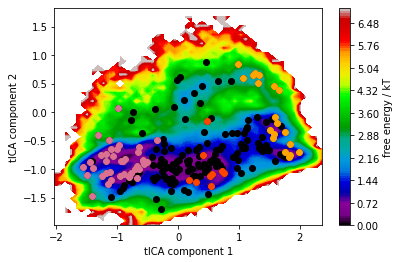

In [156]:
fig, axes = pp.plot_free_energy(tica_concatenated_wt[:, 0], tica_concatenated_wt[:, 1], nbins=50)
plt.xlabel('tICA component 1')
plt.ylabel('tICA component 2')

#axes.set_xlim(-2.7,1.7)
#axes.set_ylim(-4.5,3)

plt.scatter(cluster_wt.clustercenters[:,0], cluster_wt.clustercenters[:,1], color = 'black')

# state 0
selected_states = [4,29,61,70,87,122,136,152,158]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'orangered')

# state 1
selected_states = [0,48,52,57,59,78,80,109,113,116,130,137,151,165,173,176,177,184,185]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'orange')
    
# state 2
selected_states = [1,7,10,19,21,25,27,28,30,39,46,49,55,60,62,69,74,82,89,97,98,102,114,117,134,140,141,147,162,163,174,175,180,183,188,191,195,196]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'palevioletred')
    
# state 3
#selected_states = [10,38,60,87,112,143,173]
#for cl in selected_states:
#    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'olivedrab')
    
# state 4
#selected_states = [19,80,169,181]
#for cl in selected_states:
#    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'crimson')

fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_clusters_membership_cutoff_80.pdf', bbox_inches = 'tight')


You can also extract frames from specific clusters you are interested in. 
For example, getting structures from abbrogated central well:

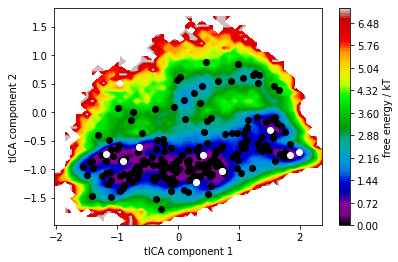

In [164]:
fig, axes = pp.plot_free_energy(tica_concatenated_wt[:, 0], tica_concatenated_wt[:, 1], nbins=50)
plt.xlabel('tICA component 1')
plt.ylabel('tICA component 2')

#axes.set_xlim(-2.7,1.7)
#axes.set_ylim(-4.5,3)

plt.scatter(cluster_wt.clustercenters[:,0], cluster_wt.clustercenters[:,1], color = 'black')

# state 0
selected_states = [70]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'orangered')

# state 1
selected_states = [61]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'orange')
    
# state 2
selected_states = [19]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'palevioletred')
    
# state 3
#selected_states = [10,38,60,87,112,143,173]
#for cl in selected_states:
#    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'olivedrab')
    
# state 4
#selected_states = [19,80,169,181]
#for cl in selected_states:
#    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'crimson')
    
# Central well
selected_states = [0,7,10,19,29,48,52,61,70]
for cl in selected_states:
    plt.scatter(cluster_wt.clustercenters[cl,0], cluster_wt.clustercenters[cl,1], color = 'white')
    
fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_well_clusters.pdf', bbox_inches = 'tight')

    

In [165]:
selected_states = [0,7,10,19,29,48,52,61,70]

for cl in selected_states:
    print('microstate = '+str(cl))
    print(msm_wt.metastable_memberships[cl,:]) #Metastable membership of microstate N
    print(msm_wt.metastable_assignments[cl]) #Macrostate assignment of microstate N
    print(str(len(cluster_wt.index_clusters[cl]))+'\n')  #Number of frames in microstate N

microstate = 0
[0.08858858 0.82349315 0.08791827]
1
1482

microstate = 7
[0.00195419 0.03063971 0.9674061 ]
2
3087

microstate = 10
[0.00975242 0.06419697 0.92605061]
2
1132

microstate = 19
[0.00710875 0.05302075 0.9398705 ]
2
2036

microstate = 29
[0.97988979 0.00335671 0.0167535 ]
0
2114

microstate = 48
[0.08377576 0.81677334 0.09945091]
1
1533

microstate = 52
[0.0855106  0.83144333 0.08304607]
1
1591

microstate = 61
[0.81366986 0.08935248 0.09697766]
0
1236

microstate = 70
[0.93387813 0.02524088 0.04088099]
0
1078



In [166]:
#Pulling 10 representative frames from microstate cl
for cl in selected_states:
    microstate_samples = msm_wt.sample_by_state(10)
    coor.save_traj(inp_wt, microstate_samples[cl], '/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_central_well/macrostate'+str(N)+'_microstate'+str(cl)+'.xtc')
    print(microstate_samples[cl])

13-10-20 18:55:13 pyemma.coordinates.api INFO     Created file /net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_central_well/macrostate2_microstate0.xtc
[[  10 1796]
 [   0 3249]
 [   0 3010]
 [   0 8052]
 [   0 2242]
 [   0 3253]
 [   0  326]
 [   0 7918]
 [  18 5270]
 [  10 3357]]
13-10-20 18:55:13 pyemma.coordinates.api INFO     Created file /net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_central_well/macrostate2_microstate7.xtc
[[  25 1331]
 [   2 3635]
 [  25 5094]
 [  25 4500]
 [  25 1609]
 [  26  815]
 [   2 1380]
 [  25 4661]
 [  26 3725]
 [  26  923]]
13-10-20 18:55:13 pyemma.coordinates.api INFO     Created file /net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/WT_central_well/macrostate2_microstate10.xtc
[[  26 6000]
 [   2 5481]
 [  29 3533]
 [  26  340]
 [  27 1223]
 [   2  239]
 [  26 5259]
 [  27 4782]
 [  27    7]
 [   2 3068]]
13-10-20 18:55:13 pyemma.coordinates.api INFO     Created file /net/data

### Calculating Mean First Passage Times (MFPT)

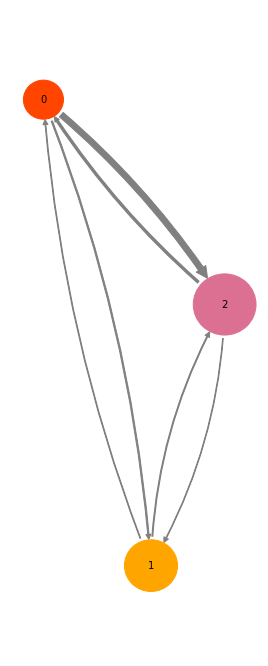

In [293]:
# Plotting image (again)
fig, axes = mplt.plot_markov_model(hmm_3_5ns_wt, state_colors=['orangered','orange', 'palevioletred'], arrow_labels=None)
#fig, axes = mplt.plot_markov_model(hmm_wt, state_colors=['orangered','orange','palevioletred','cornflowerblue'], arrow_labels=None)
gca().set_frame_on(False)

In [294]:
nstates = 3
hmm_3_5ns_wt.pcca(nc)

NotImplementedError: PCCA is not meaningful for Hidden Markov models. If you really want to do this, initialize an MSM with the HMSM transition matrix.

In [178]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm_wt.mfpt(
            msm_wt.metastable_sets[i],
            msm_wt.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(0, nstates), columns=range(0, nstates))

MFPT / steps:


,0,1,2
0,0.00,875.90,454.29
1,1081.32,0.00,610.09
2,971.13,914.01,0.00


The matrix above contain MFPTs between all transitions that originate in a "line" state and end in a "column" state. Units are in frames, so it's necessary to multiply by the frame timestep to convert to units of time

# Discretization Tau mutant

Now, everything is done again for the other system...

Number of clusters = 50


Number of clusters = 100


Number of clusters = 150


Number of clusters = 200


Number of clusters = 250


Number of clusters = 300


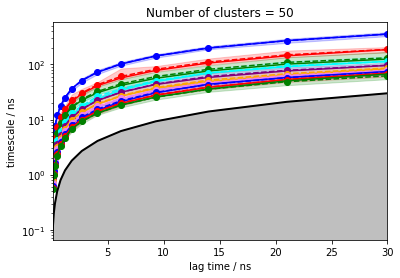

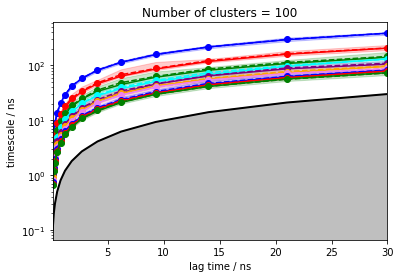

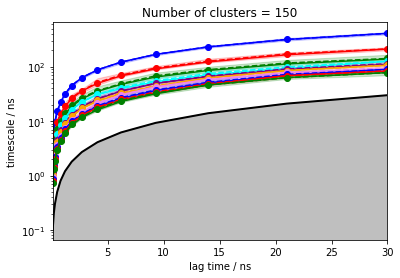

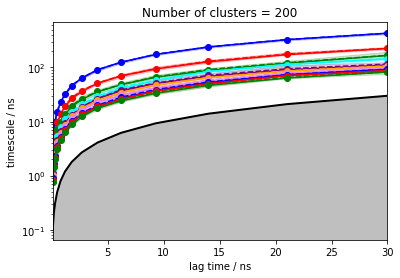

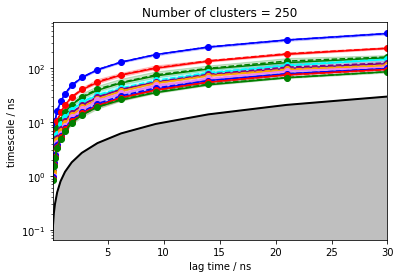

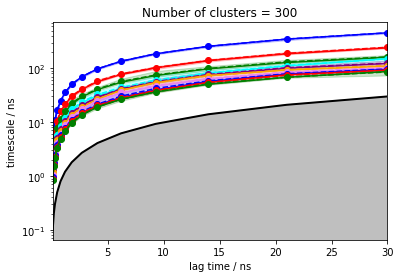

In [279]:
for i, k in enumerate([50, 100, 150, 200, 250, 300]):
    fig = plt.figure()
    print('Number of clusters = ' +str(k))
    cluster_tau = pyemma.coordinates.cluster_kmeans(tica_tau, k=k, max_iter=50, stride=10, fixed_seed=1)
    dtrajs_concatenated_tau = np.concatenate(cluster_tau.dtrajs)
    
    its = pyemma.msm.its(cluster_tau.dtrajs, lags=300, nits=10, errors='bayes')
    pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1)
    plt.title('Number of clusters = '+str(k))

### k = 250

In [280]:
cluster_tau = pyemma.coordinates.cluster_kmeans(tica_tau, k=200, max_iter=50, stride=10, fixed_seed=5)
dtrajs_concatenated_tau = np.concatenate(cluster_tau.dtrajs)

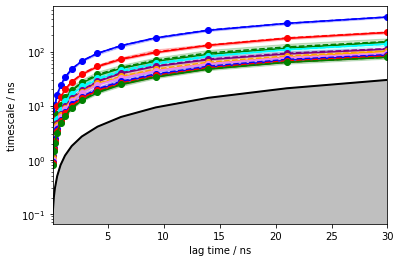

In [281]:
fig, ax = plt.subplots()

its = pyemma.msm.its(cluster_tau.dtrajs, lags=300, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_ITS_lag50_k200.pdf', bbox_inches = 'tight')

Going with 10 ns

In [282]:
msm_tau = pyemma.msm.bayesian_markov_model(cluster_tau.dtrajs, lag=150, dt_traj='0.1 ns')
#msm_tau = pyemma.msm.bayesian_markov_model(cluster_tau.dtrajs, lag=100)
print('fraction of states used = {:.2f}'.format(msm_tau.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_tau.active_count_fraction))

fraction of states used = 1.00
fraction of counts used = 1.00


In [283]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (16).

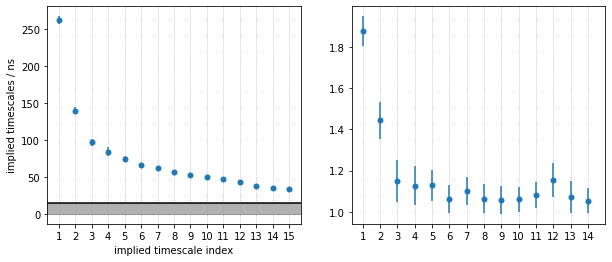

In [284]:
nits = 15

timescales_mean = msm_tau.sample_mean('timescales', k=nits)
timescales_std = msm_tau.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_tau.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_tau.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()


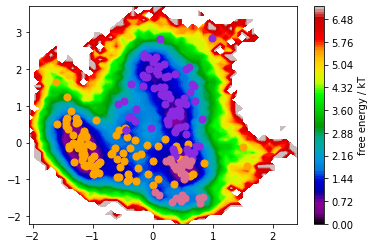

In [285]:
nc = 3
msm_tau.pcca(nc)

fig, ax = pp.plot_free_energy(tica_concatenated_tau[:, 0], tica_concatenated_tau[:, 1], nbins=50)
pcca_sets = msm_tau.metastable_sets

ax.scatter(cluster_tau.clustercenters[pcca_sets[1],0], cluster_tau.clustercenters[pcca_sets[1],1], color='orange', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[2],0], cluster_tau.clustercenters[pcca_sets[2],1], color='blueviolet', s=50)
ax.scatter(cluster_tau.clustercenters[pcca_sets[0],0], cluster_tau.clustercenters[pcca_sets[0],1], color='palevioletred', s=50)

#ax.scatter(cluster_tau.clustercenters[pcca_sets[3],0], cluster_tau.clustercenters[pcca_sets[3],1], color='cornflowerblue', s=50)
#ax.scatter(cluster_tau.clustercenters[pcca_sets[4],0], cluster_tau.clustercenters[pcca_sets[4],1], color='crimson', s=50)
#ax.scatter(cluster_tau.clustercenters[pcca_sets[5],0], cluster_tau.clustercenters[pcca_sets[5],1], color='purple', s=50)
#ax.scatter(cluster_tau.clustercenters[pcca_sets[6],0], cluster_tau.clustercenters[pcca_sets[6],1], color='silver', s=50)
#ax.scatter(cluster_tau.clustercenters[pcca_sets[7],0], cluster_tau.clustercenters[pcca_sets[7],1], color='cyan', s=50)
#ax.scatter(cluster_tau.clustercenters[pcca_sets[8],0], cluster_tau.clustercenters[pcca_sets[8],1], color='white', s=50)

#ax.scatter(cl.clustercenters[pcca_sets[7],0], cl.clustercenters[pcca_sets[7],1], color='orange', s=50)

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_PCCA_lag50_k200_3states.pdf', bbox_inches = 'tight')

22-10-20 01:30:55 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[150] WARNING  Changed user setting nits to the number of available timescales nits=2


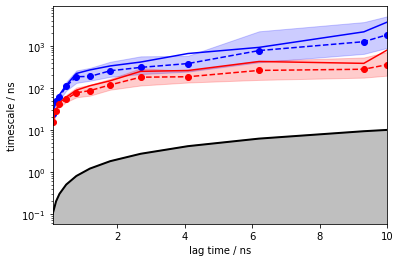

In [286]:
fig, ax = plt.subplots()

its = pyemma.msm.timescales_hmsm(cluster_tau.dtrajs, 3, lags=100, nits=5, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_HSMS_ITS_lag50_k200_lag_10ns_3states_5dist.pdf', bbox_inches = 'tight')

In [287]:
hmm_3_5ns_tau = pyemma.msm.bayesian_hidden_markov_model(cluster_tau.dtrajs, 3, lag=50)

In [288]:
hmm_3_5ns_tau.stationary_distribution

array([0.13372153, 0.56434675, 0.30193172])

In [289]:
hmm_3_5ns_tau.sample_std('stationary_distribution')

array([0.05480463, 0.14780917, 0.11151937])

In [290]:
hmm_3_5ns_tau.mfpt(2,1)

18956.398085873567

In [184]:
hmm_3_5ns_tau.lifetimes(1)

TypeError: 'numpy.ndarray' object is not callable

/net/home/cricci/anaconda3/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: divide by zero encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/net/home/cricci/anaconda3/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: invalid value encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/net/home/cricci/anaconda3/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:396: RuntimeWarning: invalid value encountered in true_divide
  L = L / np.sqrt(s[np.newaxis, :])


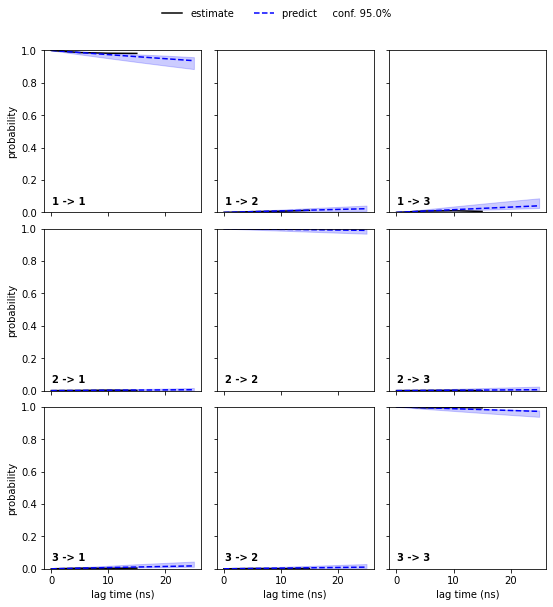

In [291]:

_, ax = pyemma.plots.plot_cktest(hmm_3_5ns_tau.cktest(mlags=6), units='ns', dt=0.1)

#_.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_CK_HMSM_lag50_k200_lag10ns_3states_5ns_5dist.pdf', bbox_inches = 'tight')

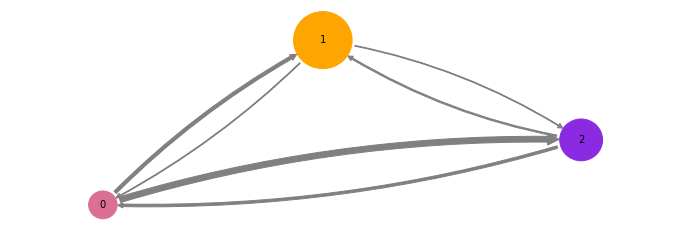

In [293]:
# Plotting image
#fig, axes = mplt.plot_markov_model(hmm_wt, state_colors=['olivedrab','thistle','palevioletred','purple','crimson'], arrow_labels=None)
fig, axes = mplt.plot_markov_model(hmm_3_5ns_tau, state_colors=['palevioletred','orange', 'blueviolet'], arrow_labels=None)
gca().set_frame_on(False)
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/tica_Tau_HMSM_lag_50_k200_lag10ns_3states_5ns_5dist.pdf', bbox_inches = 'tight')

In [294]:
# Save model
cluster_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/Tau_6distances_lag_50steps_k=200_clustering_kmeans.pyemma', overwrite=True, model_name='kmeans_tau_nsteps_50_k200')
msm_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/Tau_6distances_lag_50steps_k=200_MSMlag=10ns_4states_HMSM.pyemma', overwrite=True, model_name='msm_tau_nsteps_50_HMSM')

22-10-20 01:32:47 pyemma._base.serialization.h5file INFO     overwriting model "kmeans_tau_nsteps_50_k200" in file /net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/Tau_6distances_lag_50steps_k=200_clustering_kmeans.pyemma
22-10-20 01:32:47 pyemma._base.serialization.h5file INFO     overwriting model "msm_tau_nsteps_50_HMSM" in file /net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/Tau_6distances_lag_50steps_k=200_MSMlag=10ns_4states_HMSM.pyemma


/net/home/cricci/anaconda3/lib/python3.7/site-packages/pyemma/_base/serialization/pickle_extensions.py:52: UserWarning: BLOSC compression filter unavailable. Your resulting file may be large and not optimal to process.
  warnings.warn('BLOSC compression filter unavailable. '


In [295]:
hmm_tau = msm_tau.coarse_grain(3)
hmm_tau.stationary_distribution

22-10-20 01:32:52 pyemma.msm.estimators.bayesian_msm.BayesianMSM[149] WARNING  Requested coarse-grained model with 3 metastable states at lag=150. The ratio of relaxation timescales between 3 and 4 states is only 1.4805916948229458 while we recommend at least 1.5. It is possible that the resulting HMM is inaccurate. Handle with caution.


array([0.08717924, 0.10767246, 0.80514829])

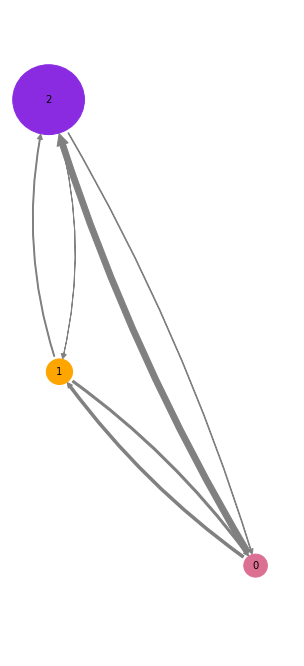

In [297]:
# Plotting image
fig, axes = mplt.plot_markov_model(hmm_tau, state_colors=['palevioletred','orange', 'blueviolet'], arrow_labels=None)
gca().set_frame_on(False)
#fig.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/CA_Model/Tau_HMM_5distances_lag_50steps_k_300_lag_10ns_9states.pdf', bbox_inches = 'tight')


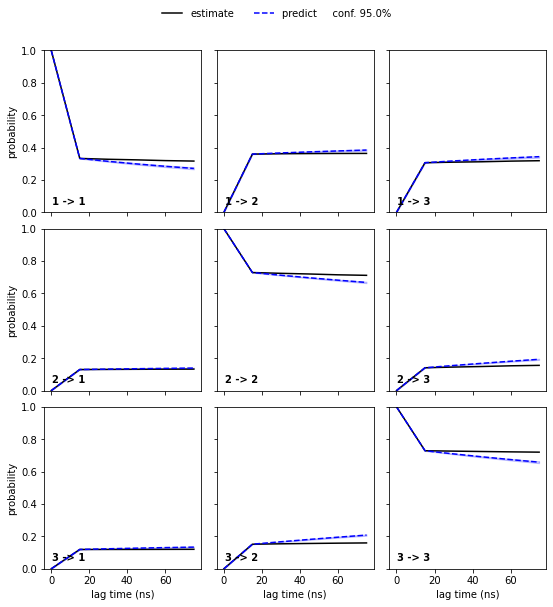

In [298]:
nstates = 3
cktest = msm_tau.cktest(nstates, mlags=6)

_, ax =  pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
#_.savefig('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/tica_steps_50/Tau_CK_HMM_6distances_lag_50ns_k_200_lag_10ns_4states_5ns.pdf', bbox_inches = 'tight')


In [162]:
# Save model
#cluster_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/Tau_6distances_features_k=200_clustering.pyemma', overwrite=True, model_name='kmeans_tau_k200')
#msm_tau.save('/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/Tau_6distances_lag_100steps_k=200_MSMlag=10ns_4states_HMSM_lag_5ns_nstep.pyemma', overwrite=True, model_name='msm_tau')

### Selecting structures

In [309]:
indir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau' ## directory with input coordinates
otdir = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/NEW_Tau_simulations/production/simulations4MSM'## directory with new set of coordinates
topfile = '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/Tau_nowater.prmtop' ## topology file
from glob import glob
traj_list1 = glob(indir + '/nowater*.nc')
traj_list1.sort() # Creating a list with all trajectory files in ascending order
traj_list2= glob(otdir + '/*nc')
traj_list2.sort() # Creating a list with all trajectory files in ascending order
traj_list = traj_list1 + traj_list2 # combining the two lists


print(traj_list)




['/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf1.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf10.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf2.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf3.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf4.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf5.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf6.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf7.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf8.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf9.nc', '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/NEW_Tau_simulations/p

In [300]:
feat = coor.featurizer(topfile)

In [305]:
inp_tau = coor.source(traj_list, features=feat)

In [308]:
macrostates = 3

for N in range(0,macrostates):
    microstates = []
    
    ## Microstates belonging to macrostates N
    for i in msm_tau.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability and select only clusters with membership above cutoff
    
    representative_microstates = []
    for cl in microstates:
        if msm_tau.metastable_memberships[cl][N] > 0.88:   ## Specify the state membership cutoff you would like
            print('microstate = '+str(cl))
            print(msm_tau.metastable_memberships[cl,:]) # Obtain metastable membership of microstate N
            print(msm_tau.metastable_assignments[cl]) #Obtain macrostate assignment of microstate N
            print(str(len(cluster_tau.index_clusters[cl]))+'\n')  #Obtain number of frames in microstate N
            representative_microstates.append(cl)
            
            
    #Pulling 10 representative frames from selected microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_tau.sample_by_state(10)
        # Give directory path of where structures should be saved
        coor.save_traj(inp_tau, microstate_samples[cl],'/net/data/cricci/backup/CK1delta/MSM/APO/MSModels/Model2/new_CA_model/Tau_selected_structures/macrostate'+str(N)+'_microstate'+str(cl)+'.xtc')
        print(microstate_samples[cl])


MACROSTATE 0
MACROSTATE 1
microstate = 5
[0.06922874 0.89410718 0.03666408]
1
1204

microstate = 7
[0.03041594 0.95838901 0.01119504]
1
1546

microstate = 12
[0.02227921 0.97279341 0.00492737]
1
1265

microstate = 18
[0.00408848 0.96885837 0.02705315]
1
809

microstate = 21
[0.03057673 0.95716045 0.01226281]
1
1615

microstate = 24
[0.00772882 0.97384918 0.018422  ]
1
1277

microstate = 33
[0.01376095 0.97281581 0.01342324]
1
995

microstate = 34
[0.01834283 0.96168676 0.01997041]
1
1639

microstate = 38
[0.00323365 0.99013408 0.00663227]
1
820

microstate = 48
[0.00786003 0.98407856 0.00806141]
1
901

microstate = 49
[0.00730143 0.95913556 0.03356301]
1
694

microstate = 50
[0.01034412 0.9831721  0.00648378]
1
1648

microstate = 53
[0.06533849 0.88334043 0.05132108]
1
962

microstate = 63
[0.05186653 0.93205139 0.01608209]
1
1317

microstate = 69
[0.01416757 0.98085634 0.00497609]
1
1910

microstate = 71
[0.00121281 0.99878719 0.        ]
1
1137

microstate = 77
[0.00542246 0.98167744

ValueError: largest specified index (9007.0 * stride=9007.0 * 1=9007) is larger than trajectory length '/net/data/cricci/backup/CK1delta/MSM/APO/PLUS_3rd_ANION/simulations_Tau/nowater_conf7.nc' = 9003

In [271]:
# Lowering the cutoff for states 0 and 3

macrostates = 5

for N in range(4,5):
    microstates = []
    
    ## Microstates belonging to macrostates
    for i in msm_y220c.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability
    
    representative_microstates = []
    for cl in microstates:
        if msm_y220c.metastable_memberships[cl][N] > 0.93:
            print('microstate = '+str(cl))
            print(msm_y220c.metastable_memberships[cl,:]) #Metastable membership of microstate N
            print(msm_y220c.metastable_assignments[cl]) #Macrostate assignment of microstate N
            print(str(len(cluster_y220c.index_clusters[cl]))+'\n')  #Number of frames in microstate N
            representative_microstates.append(cl)
            
            
    #Pulling 10 representative frames from microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_y220c.sample_by_state(10)
        coor.save_traj(inp_y220c, microstate_samples[cl], '/scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate'+str(N)+'_microstate'+str(cl)+'.xtc')
        print(microstate_samples[cl])

MACROSTATE 4
microstate = 33
[0.00109367 0.00150285 0.00882866 0.0507154  0.93785943]
4
3714

microstate = 45
[0.00332952 0.00440826 0.02089762 0.0365882  0.93477639]
4
2611

microstate = 81
[0.0017312  0.00227689 0.00914592 0.0344928  0.95235319]
4
3399

microstate = 139
[4.57238253e-04 6.65675301e-04 2.65810966e-03 5.98038300e-02
 9.36415147e-01]
4
2049

microstate = 180
[0.00220628 0.00290905 0.01538784 0.03599494 0.94350189]
4
3436

11-02-20 13:52:06 pyemma.coordinates.api INFO     Created file /scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate4_microstate33.xtc
[[  16 1607]
 [  16 1298]
 [ 174  262]
 [ 179 1145]
 [ 156 1811]
 [ 176  317]
 [  14 1375]
 [ 179  583]
 [ 156 1400]
 [ 179  895]]
11-02-20 13:52:06 pyemma.coordinates.api INFO     Created file /scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate4_microstate45.xtc
[[ 161 1081]
 [ 165  340]
 [  

In [183]:
# Lowering the cutoff for states 0 and 3

macrostates = 5

for N in range(3,4):
    microstates = []
    
    ## Microstates belonging to macrostates
    for i in msm_y220c.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability
    
    representative_microstates = []
    for cl in microstates:
        if msm_y220c.metastable_memberships[cl][N] > 0.80:
            print('microstate = '+str(cl))
            print(msm_y220c.metastable_memberships[cl,:]) #Metastable membership of microstate N
            print(msm_y220c.metastable_assignments[cl]) #Macrostate assignment of microstate N
            print(str(len(cluster_y220c.index_clusters[cl]))+'\n')  #Number of frames in microstate N
            representative_microstates.append(cl)
            
            
    #Pulling 10 representative frames from microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_y220c.sample_by_state(10)
        coor.save_traj(inp_y220c, microstate_samples[cl], '/scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate'+str(N)+'_microstate'+str(cl)+'.xtc')
        print(microstate_samples[cl])

MACROSTATE 3
microstate = 3
[0.04722224 0.05274113 0.01578808 0.86407705 0.0201715 ]
3
2960

microstate = 60
[0.03084991 0.04067491 0.01534792 0.82311029 0.09001696]
3
3348

microstate = 88
[4.11771082e-02 3.92130816e-02 8.86868654e-03 9.10741124e-01
 6.59966872e-15]
3
3653

07-02-20 13:46:16 pyemma.coordinates.api INFO     Created file /scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate3_microstate3.xtc
[[ 146  116]
 [ 145 2108]
 [ 144 1023]
 [  95 2118]
 [ 144  901]
 [ 144  752]
 [ 144 1268]
 [ 146  390]
 [ 145  169]
 [ 144  723]]
07-02-20 13:46:16 pyemma.coordinates.api INFO     Created file /scratch/epecoradebarros/p53_MSM/notebooks/joint_WT_Y220C_MSM/PAPER/L1/tica=10ns/selected_structures/Y220C/macrostate3_microstate60.xtc
[[ 144 1275]
 [ 148 2904]
 [ 146 1517]
 [ 147  397]
 [ 147  575]
 [ 144 2675]
 [  95 1928]
 [ 148 2510]
 [ 144   27]
 [ 148 1092]]
07-02-20 13:46:16 pyemma.coordinates.api INFO     Created file /s

Finding out where these clusters are in the map

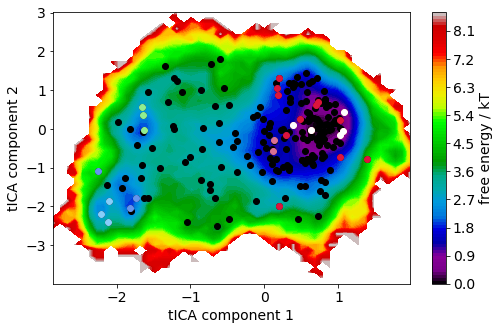

In [273]:
fig, axes = pp.plot_free_energy(tica_concatenated_y220c[:, 0], tica_concatenated_y220c[:, 1], nbins=50)
plt.xlabel('tICA component 1')
plt.ylabel('tICA component 2')

#axes.set_xlim(-2.7,1.7)
#axes.set_ylim(-4.5,3)

plt.scatter(cluster_y220c.clustercenters[:,0], cluster_y220c.clustercenters[:,1], color = 'black')

# state 0
selected_states = [15,156,168]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'cornflowerblue')

# state 1
selected_states = [24,127,169]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'lightskyblue')
    
# state 2
selected_states = [25,141]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'palevioletred')
    
# state 3
selected_states = [3,60,88]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'lightgreen')
    
# state 4
selected_states = [8,16,28,32,33,36,45,81,131,139,147,158,170,180,187,193]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'crimson')
    
# state 4 cutoff 0.93
selected_states = [33,45,81,139,180]
for cl in selected_states:
    plt.scatter(cluster_y220c.clustercenters[cl,0], cluster_y220c.clustercenters[cl,1], color = 'white')

- MFPT

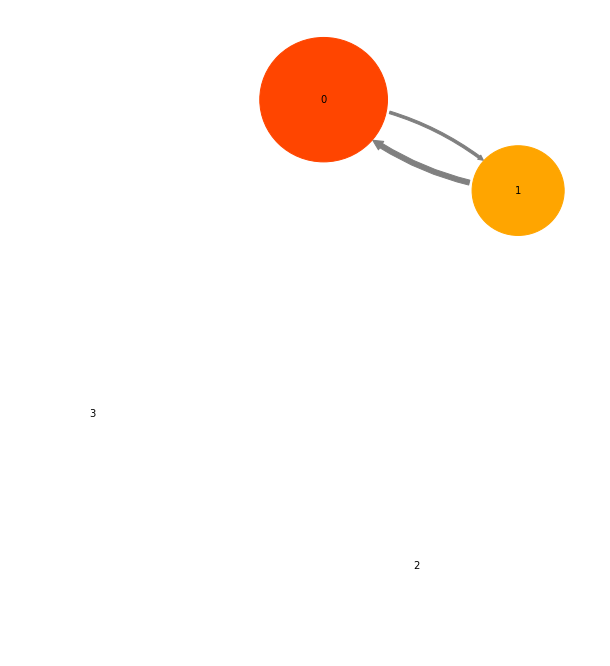

In [212]:
# Plotting image
fig, axes = mplt.plot_markov_model(hmm_tau, state_colors=['orangered','orange','palevioletred','cornflowerblue'], arrow_labels=None)
gca().set_frame_on(False)

In [220]:
nstates = 2
msm_tau.pcca(nc)

PCCA(P=array([[0.16365, 0.     , ..., 0.     , 0.00495],
       [0.     , 0.28309, ..., 0.00031, 0.     ],
       ...,
       [0.     , 0.00042, ..., 0.15663, 0.     ],
       [0.02054, 0.     , ..., 0.     , 0.17965]]),
   m=3)

In [221]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm_tau.mfpt(
            msm_tau.metastable_sets[i],
            msm_tau.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(0, nstates), columns=range(0, nstates))

MFPT / steps:


,0,1
0,0.00,1882.98
1,531.72,0.00
